**Task 1**

**Exploratory Sales Analysis**

*Performing exploratory data analysis (EDA) on sales data
to understand trends, seasonality, and missing values.*

**Train.csv:**

* The training data, comprising time series of features store_nbr, family, and onpromotion as well as the target sales.
* Store_nbr identifies the store at which the products are sold. family identifies the type of product sold.
* Sales gives the total sales for a product family at a particular store at a given date. Fractional values are possible since products can be sold in fractional units (1.5 kg of cheese, for instance, as opposed to 1 bag of chips).
* Onpromotion gives the total number of items in a product family that were being promoted at a store at a given date.

Dataset link: https://www.kaggle.com/competitions/store-sales-time-series-forecasting/data

In [1]:
#Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset
data = pd.read_csv('/content/train.csv')

In [3]:
#displaying sme columns of the datset
data.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
#shape of the dataset
data.shape

(3000888, 6)

In [5]:
#information of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 137.4+ MB


In [6]:
#checking if there are any missing values
data.isnull().sum()

,0
id,0
date,0
store_nbr,0
family,0
sales,0
onpromotion,0


In [7]:
#more about data
data.describe()

,id,store_nbr,sales,onpromotion
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06
mean,1.500444e+06,2.750000e+01,3.577757e+02,2.602770e+00
std,8.662819e+05,1.558579e+01,1.101998e+03,1.221888e+01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,7.502218e+05,1.400000e+01,0.000000e+00,0.000000e+00
50%,1.500444e+06,2.750000e+01,1.100000e+01,0.000000e+00
75%,2.250665e+06,4.100000e+01,1.958473e+02,0.000000e+00
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02


In [8]:
#finding mean, median, mode of the sales
mean_sales = data['sales'].mean()
median_sales = data['sales'].median()
mode_sales = data['sales'].mode()[0]

In [9]:
print(mean_sales)
print(median_sales)
print(mode_sales)

357.77574911261894
11.0
0.0


In [10]:
#changing the data row to date time format
data['date'] = pd.to_datetime(data['date'])

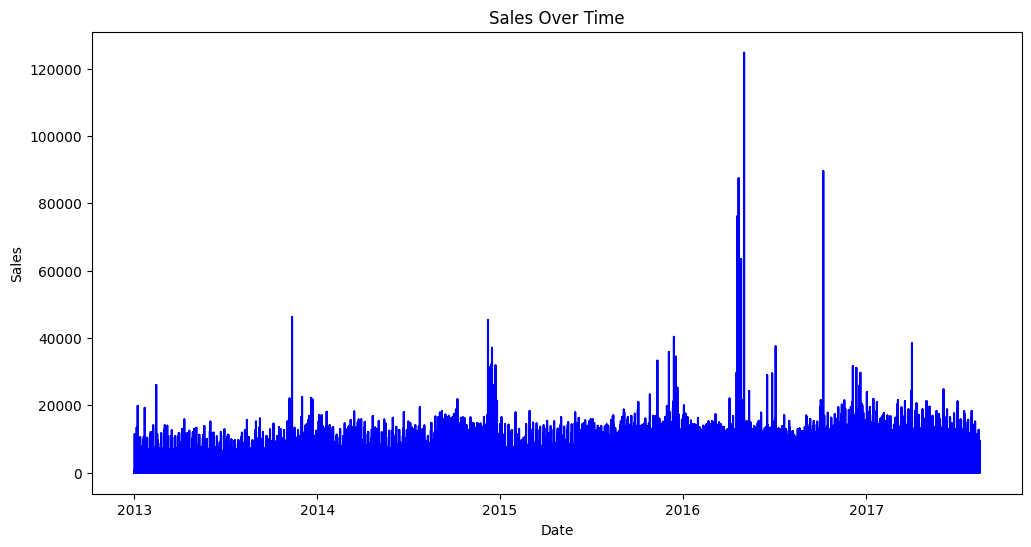

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data['date'], data['sales'], color='blue')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

The sales data shows a relatively consistent baseline of low to moderate sales throughout the 2013-2017 period, interrupted by infrequent, massive spikes in sales. There appears to be a general upward trend in the maximum peak sales over time, with the largest recorded sale event occurring around mid-2016, significantly exceeding all other sales.

(0.0, 1000.0)

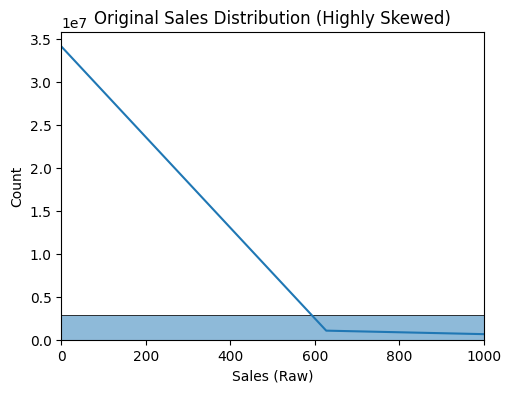

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data['sales'], bins=50, kde=True)
plt.title('Original Sales Distribution (Highly Skewed)')
plt.xlabel('Sales (Raw)')
plt.xlim(0, 1000)

The plot titled "Original Sales Distribution (Highly Skewed)" is extremely right-skewed, indicating that the vast majority of sales are clustered at very low raw values, with large sales figures being rare outliers. This distribution suggests the need for a logarithmic or other non-linear transformation to normalize the data before modeling.

In [13]:
data['sales_log'] = np.log1p(data['sales'])

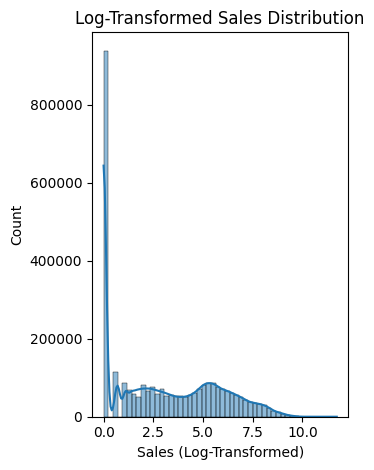

In [14]:
plt.subplot(1, 2, 2)
sns.histplot(data['sales_log'], bins=50, kde=True)
plt.title('Log-Transformed Sales Distribution')
plt.xlabel('Sales (Log-Transformed)')
plt.tight_layout()
plt.show()

The log-transformation successfully reduced the high positive skew, but the distribution is now bimodal, with a massive peak clustered near zero and a second, broader, near-normal distribution centered around a value of approximately 5.0 on the log scale. The first peak at zero likely represents days with zero or very low sales, while the second mode represents the typical pattern of positive daily sales.

In [15]:
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

/tmp/ipython-input-2038297337.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')


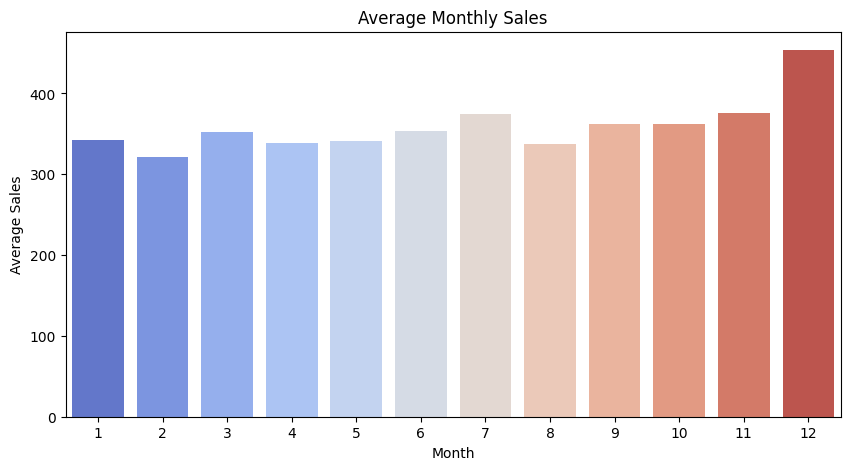

In [16]:
monthly_sales = data.groupby('month')['sales'].mean()


plt.figure(figsize=(10,5))
sns.barplot(x=monthly_sales.index, y=monthly_sales.values, palette='coolwarm')
plt.title('Average Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.show()

Average monthly sales show a clear seasonal pattern, with the highest sales occurring in December (Month 12). Sales are generally moderate and relatively stable throughout the first 11 months, typically ranging between 320 and 380 units/value, before a significant spike to over 450 units/value in December.

/tmp/ipython-input-4065007141.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_sales.index, y=store_sales.values, palette='viridis')


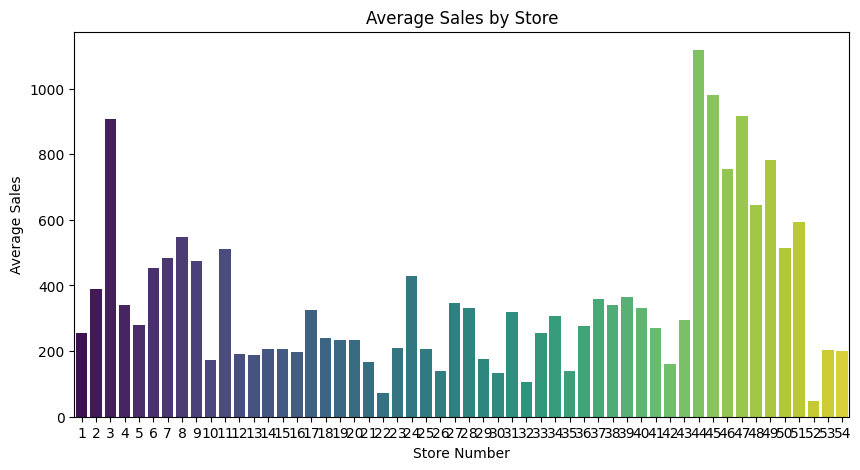

In [17]:
store_sales = data.groupby('store_nbr')['sales'].mean().sort_values(ascending=False)


plt.figure(figsize=(10,5))
sns.barplot(x=store_sales.index, y=store_sales.values, palette='viridis')
plt.title('Average Sales by Store')
plt.xlabel('Store Number')
plt.ylabel('Average Sales')
plt.show()

The distribution of average sales is highly unequal across the different stores. A small subset of stores, particularly those in the range of Store 44 through Store 50, show significantly higher average sales (often over 700 and peaking above 1100), dwarfing the sales of the majority of other stores, which mostly maintain average sales below 600.